In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,CGPA,Chance of Admit
0,1,337,118,4,9.65,0.92
1,2,324,107,4,8.87,0.76
2,3,316,104,3,8.00,0.72
3,4,322,110,3,8.67,0.80
4,5,314,103,2,8.21,0.65


In [5]:
columns =(['Serial_No','GRE_Score','TOEFL_Score','University_Rating','CGPA','Chance_of_Admit'])
df.columns = columns
pd.set_option('display.max_columns', 500)
df.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,CGPA,Chance_of_Admit
0,1,337,118,4,9.65,0.92
1,2,324,107,4,8.87,0.76
2,3,316,104,3,8.00,0.72
3,4,322,110,3,8.67,0.80
4,5,314,103,2,8.21,0.65


In [6]:
df.columns

Index(['Serial_No', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'CGPA',
       'Chance_of_Admit'],
      dtype='object')

In [7]:
df.isnull().sum()


Serial_No            0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
CGPA                 0
Chance_of_Admit      0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
rating = df['University_Rating'].value_counts()

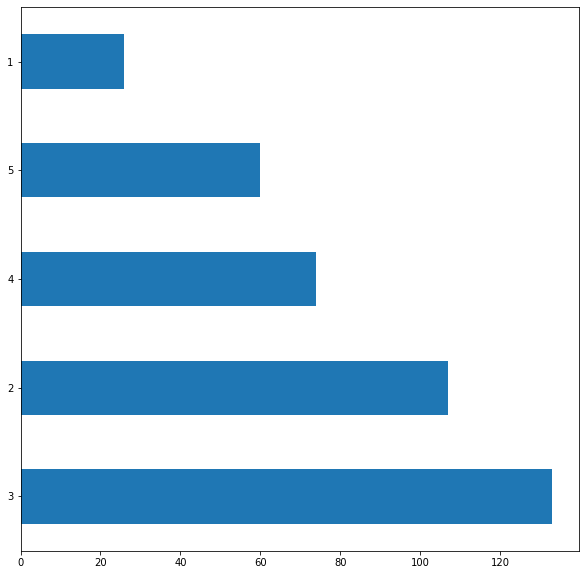

In [10]:
plt.figure(figsize=(10,10))
rating.plot.barh()

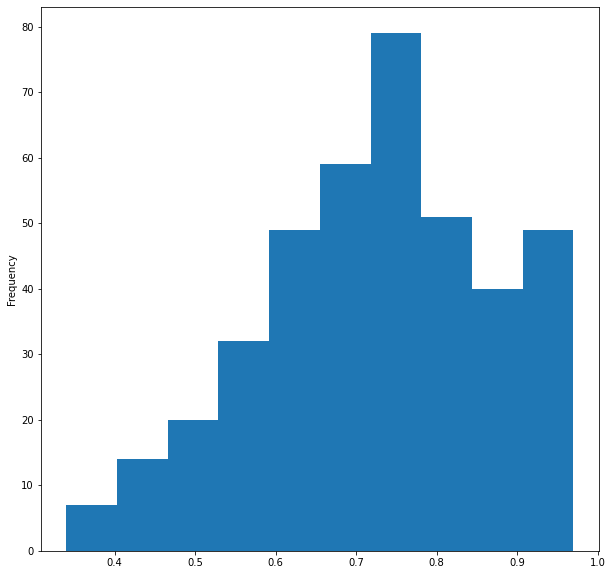

In [11]:
import seaborn as sns
admit=df['Chance_of_Admit']
plt.figure(figsize=(10,10))
admit.plot(kind='hist')


In [12]:
df.head()

,Serial_No,GRE_Score,TOEFL_Score,University_Rating,CGPA,Chance_of_Admit
0,1,337,118,4,9.65,0.92
1,2,324,107,4,8.87,0.76
2,3,316,104,3,8.00,0.72
3,4,322,110,3,8.67,0.80
4,5,314,103,2,8.21,0.65


In [13]:
X = df.iloc[:, 0: 4].values
y = df.iloc[:, 4].values

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

In [17]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
print("the model accuracy is",accuracy*100,"%")

the model accuracy is 72.13197097019152 %


Text(0.5, 1.0, 'Actual vs Prediceted values')

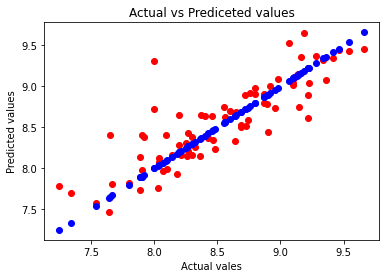

In [19]:
plt.scatter(y_test, y_pred, color = 'red')
plt.scatter(y_test, y_test, color = 'blue')
plt.xlabel('Actual vales')
plt.ylabel('Predicted values')
plt.title('Actual vs Prediceted values')

In [20]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(max_depth=2)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)


In [21]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
print("the model accuracy is",accuracy*100,"%")

the model accuracy is 56.83779430164142 %


Text(0.5, 1.0, 'Actual vs Prediceted values')

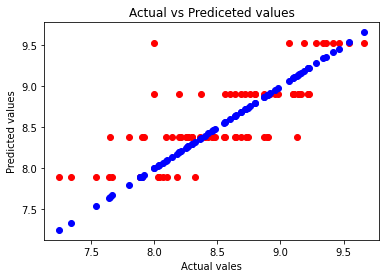

In [22]:
plt.scatter(y_test, y_pred, color = 'red')
plt.scatter(y_test, y_test, color = 'blue')
plt.xlabel('Actual vales')
plt.ylabel('Predicted values')
plt.title('Actual vs Prediceted values')

In [23]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=20, random_state=0)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [24]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
print("the model accuracy is",accuracy*100,"%")

the model accuracy is 66.17954026325718 %


Text(0, 0.5, 'Predicted values')

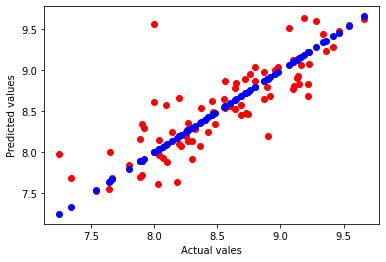

In [25]:
plt.scatter(y_test, y_pred, color = 'red')
plt.scatter(y_test, y_test, color = 'blue')
plt.xlabel('Actual vales')
plt.ylabel('Predicted values')


In [27]:
#Predicting with new data
print("The prediction with Linear Regression",model_lr.predict([[337,118,4,9.65]]))
print("The prediction with Decision Tree",model_dt.predict([[337,118,4,9.65]]))
print("The prediction with Random Forest",model_rf.predict([[337,118,4,9.65]]))

The prediction with Linear Regression [2.27755368]
The prediction with Decision Tree [7.89637931]
The prediction with Random Forest [7.683]
